# Data preprocessing

This is a small notebook that will run some preprocessing code on the raw dataforms to generate the X matrix and Y matrix. What we are basically doing is taking the [MFCC](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) of the raw audio files and get a 2D matrix. Then we will formulate the Y matrix as a one hot encoding of the 10 genres that we have.

In [1]:
import os
import sunau
import keras
import numpy as np
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import librosa
import librosa.display as display

Using TensorFlow backend.


### Processing Single Music

First, let us define one function that reads in a music file and return the MFCC matrix of the music.

In [2]:
def transform_mfcc(music_file_path):
    y, sr = librosa.core.load(music_file_path)
    return librosa.feature.mfcc(y, sr)

def transform_spec(music_file_path):
    y, sr = librosa.core.load(music_file_path)
    return librosa.feature.melspectrogram(y, sr)

mfcc_feature = transform_mfcc('genres/rock/rock.00005.au')
spectrogram = transform_spec('genres/rock/rock.00005.au')

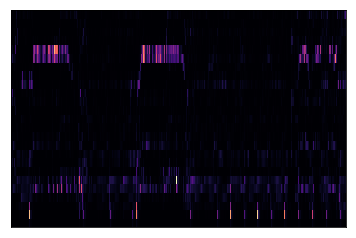

In [3]:
display.specshow(spectrogram[:25])

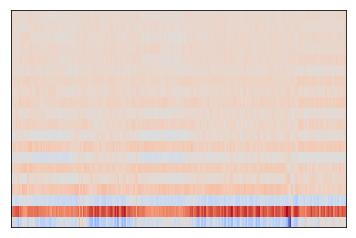

In [4]:
display.specshow(mfcc_feature)

Spectrogram representation of the music seems sufficient but we will be using the MFCC feature of the music, which is said to have better performance than the spectrogram due to its transformations.

### Processing a group of music

Now we will define functions that process a group of music given a specific file path

In [5]:
def transform_musics(directory_path):
    """ takes in a directory and return a 3D numpy array where each element is a 2D array of mfcc features.
    """
    result = []
    for root, dirs, files in os.walk (directory_path):
        for file_name in files:
            file_path = root + file_name
            result += [transform_mfcc(file_path)[:20, :1290]]
    len_set = set(music.shape for music in result)
    if len(len_set) > 1:
        print("More than 1 length of music returned {0}".format(len_set))
    return np.array(result)

# rocks = transform_musics('genres/rock/')

In [6]:
print(rocks.shape)

(100, 20, 1290)


### Processing all Music

Now we will define functions that process the entire music library and generate the X and Y.

In [6]:
def process_all(directory_path):
    sub_dirs = os.listdir('genres/')
    c = 5
    X = np.empty((0, 20, 1290))
    Y = np.empty((0, c))
    j = 0
    for i in range(len(sub_dirs)):
        print('processing genre {0}'.format(sub_dirs[i]))
        if sub_dirs[i] in ['classical', 'disco', 'rock', 'pop', 'country']:
            X_is = transform_musics('genres/{0}/'.format(sub_dirs[i]))
            X = np.concatenate((X, X_is), axis=0)
            Y_is = np.zeros((X_is.shape[0], c))
            Y_is[:, j] = 1
            Y = np.concatenate((Y, Y_is), axis=0)
            j += 1
    return X, Y

X, Y = process_all('genres/')

processing genre blues
processing genre classical
processing genre country
processing genre disco
processing genre hiphop
processing genre jazz
processing genre metal
processing genre pop
processing genre reggae
processing genre rock


In [7]:
print('X\'s shape is {0}'.format(X.shape))
print('Y\'s shape is {0}'.format(Y.shape))

X's shape is (500, 20, 1290)
Y's shape is (500, 5)


Now that we have processed all the information, we will pre-shuffle the data and save them into a matrix file so they can easily be accessed later by other notebooks!

### Saving to File

Here we write some simple code to save these matricies

In [10]:
np.save('data_mat/X2.npy', X)
np.save('data_mat/Y2.npy', Y)

This concludes the data preprocessing part of the project